In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [8]:
df=pd.read_csv('/content/Housing.csv')

In [9]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
df.shape

(545, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [13]:
df['bedrooms'].value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

In [14]:
df['bathrooms'].value_counts()

1    401
2    133
3     10
4      1
Name: bathrooms, dtype: int64

In [15]:
df['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [16]:
df['parking'].value_counts()

0    299
1    126
2    108
3     12
Name: parking, dtype: int64

In [17]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [18]:
df=df.drop(['stories','airconditioning','hotwaterheating','basement','guestroom',],axis=1) #remove unnessary coulmns

In [19]:
df.head()

,price,area,bedrooms,bathrooms,mainroad,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,yes,2,yes,furnished
1,12250000,8960,4,4,yes,3,no,furnished
2,12250000,9960,3,2,yes,2,yes,semi-furnished
3,12215000,7500,4,2,yes,3,yes,furnished
4,11410000,7420,4,1,yes,2,no,furnished


In [20]:
df.describe() #used for statistical analysis like mean median min mix vlaues standard deviation

,price,area,bedrooms,bathrooms,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,3.000000


##EDA

###UNIVARIATE ANALYSIS

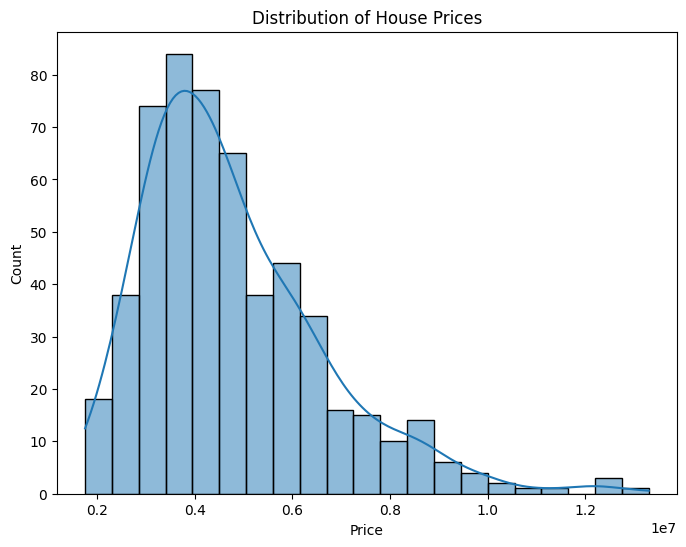

In [21]:
plt.figure(figsize=(8, 6)) #plotting frequency distributions of data
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.show()

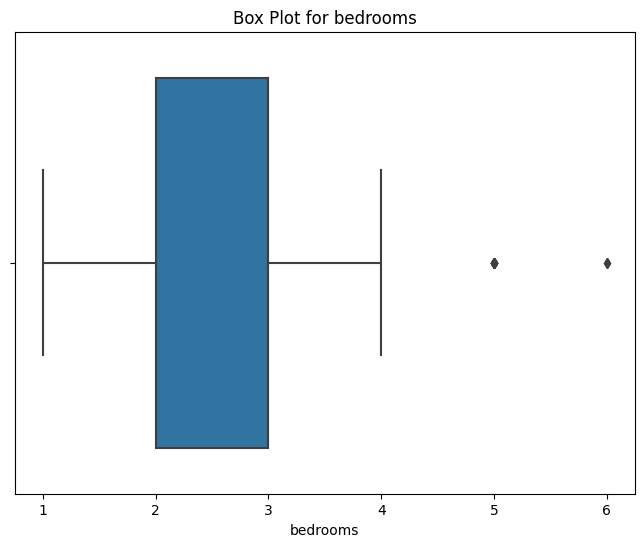

In [22]:
plt.figure(figsize=(8, 6)) #to view outliers in dataset
sns.boxplot(x='bedrooms', data=df)
plt.title('Box Plot for bedrooms')
plt.show()

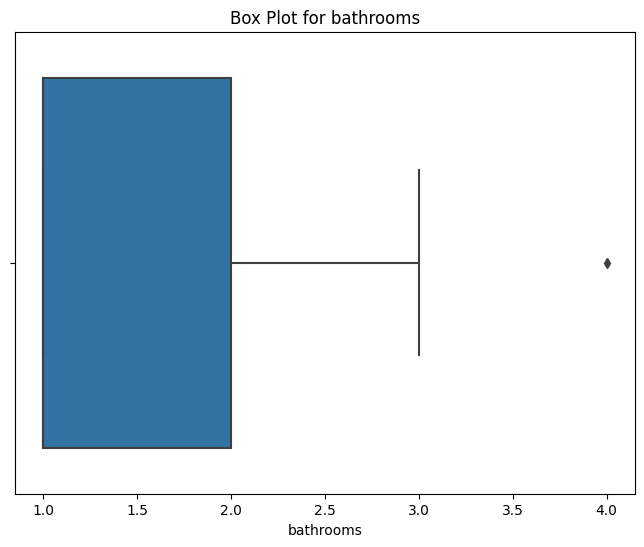

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='bathrooms', data=df)
plt.title('Box Plot for bathrooms')
plt.show()

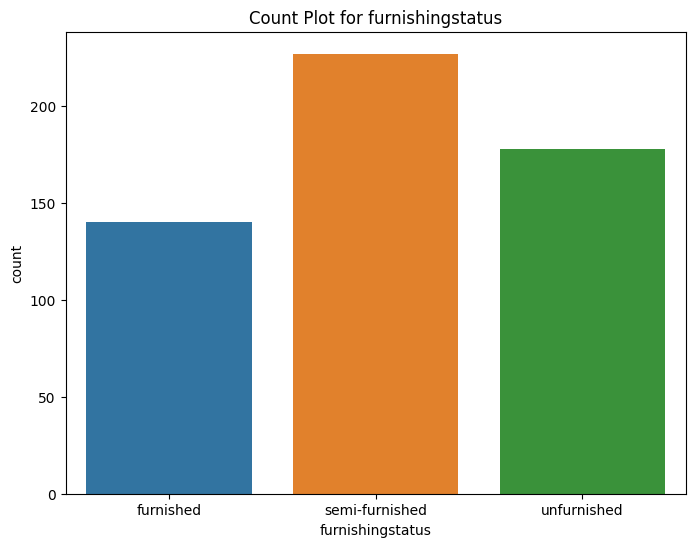

In [24]:
plt.figure(figsize=(8, 6)) #total no of records in particular column
sns.countplot(x='furnishingstatus', data=df)
plt.title('Count Plot for furnishingstatus')
plt.show()

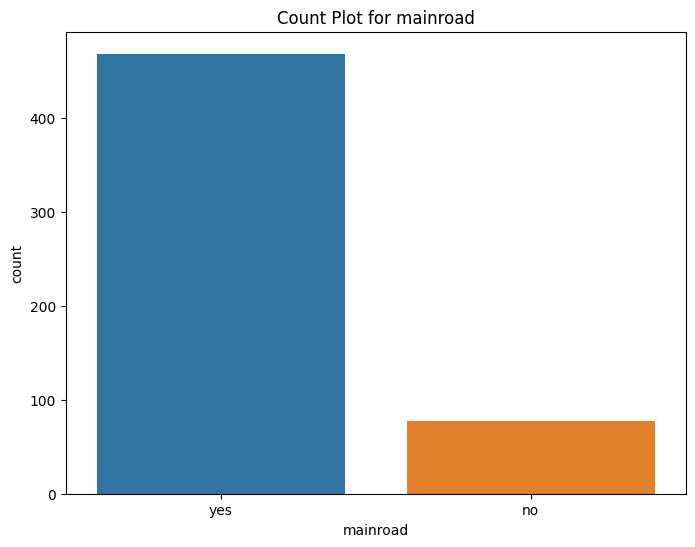

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='mainroad', data=df)
plt.title('Count Plot for mainroad')
plt.show()

##BIVARIATE ANALYSIS

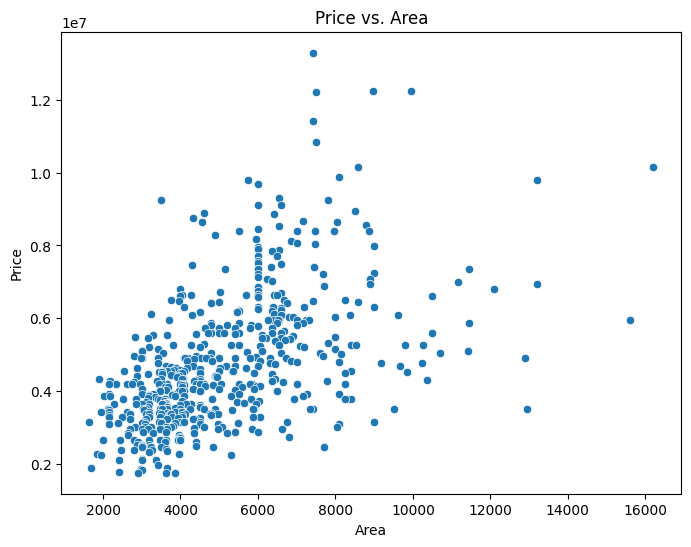

In [26]:
plt.figure(figsize=(8, 6)) #it view to use dsplay the reltionship bw two colmn or two data points
sns.scatterplot(x='area', y='price', data=df)
plt.title('Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

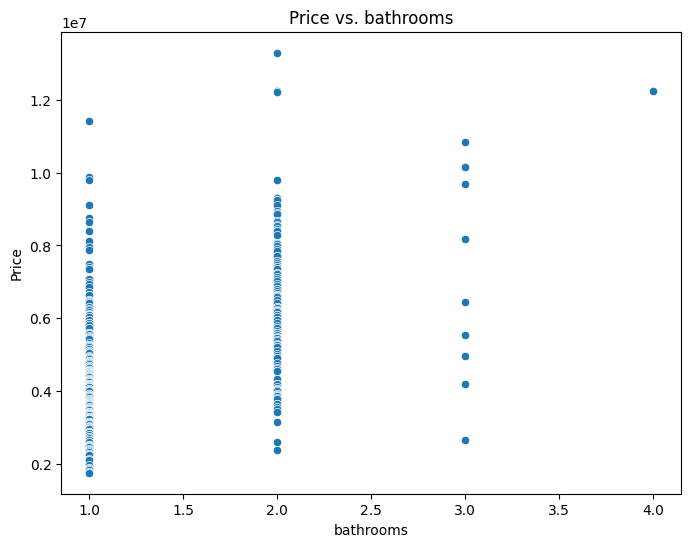

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bathrooms', y='price', data=df)
plt.title('Price vs. bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('Price')
plt.show()

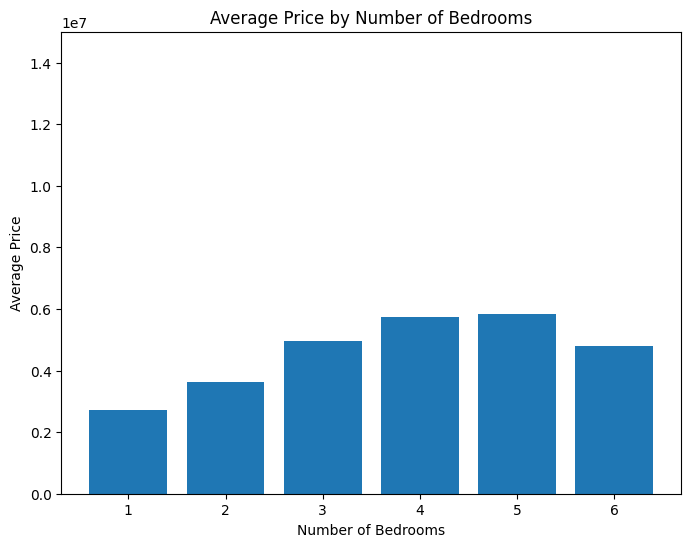

In [28]:
# Calculate the average price for each bedroom count
average_price_by_bedrooms = df.groupby('bedrooms')['price'].mean().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(average_price_by_bedrooms['bedrooms'], average_price_by_bedrooms['price'])

plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.ylim(0, 15e6)  # Adjust the limit as needed
plt.show()

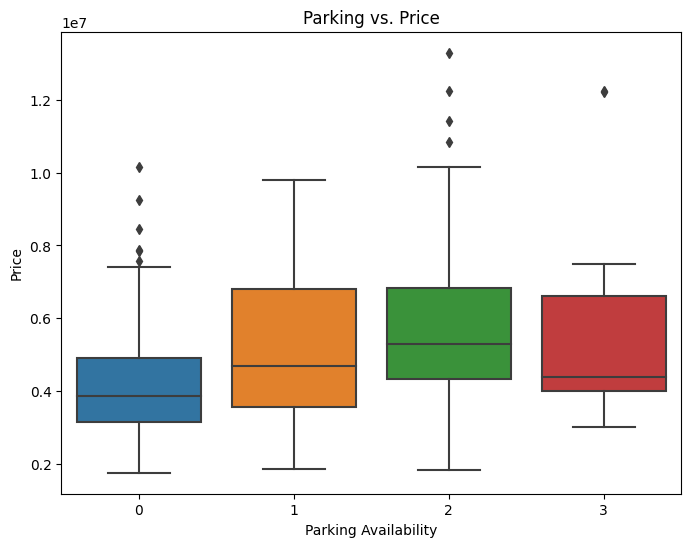

In [29]:
# Create a box plot to analyze the relationship between Parking and Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='parking', y='price', data=df)
plt.title('Parking vs. Price')
plt.xlabel('Parking Availability')
plt.ylabel('Price')
plt.xticks([0, 1, 2, 3], ['0', '1', '2', '3'])  # Customizing x-axis labels
plt.show()

<ipython-input-30-36707a641ccf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


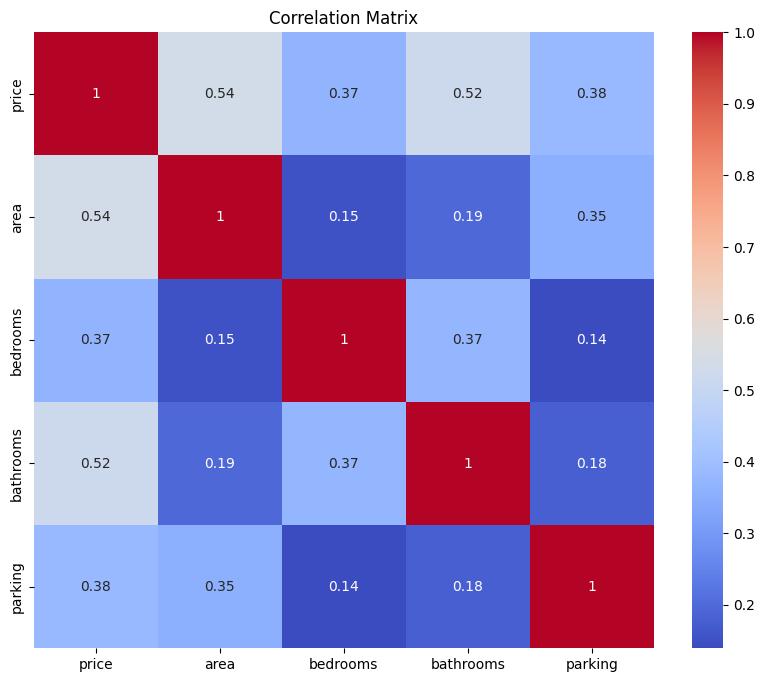

In [30]:
# Correlation matrix to identify relationships between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [31]:
# Encode binary categorical features as 1s and 0s
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 1, 'semi-furnished': 0, 'unfurnished': 0})

# linear regression

In [32]:
# Split the dataset into features (X) and the target variable (y) #apply linier relationship wth data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: {:.2f}%".format(lr_mse*100))
print("R-squared: {:.2f}%".format(lr_r2*100))

Mean Squared Error: 238264778253334.62%
R-squared: 52.86%


# support vector regreesor

In [33]:
sv_model = SVR(kernel='linear')  # You can choose the kernel based on your preference (e.g., 'linear', 'rbf')#it seprates into class fnd best highper plan that maxium margin
sv_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = sv_model.predict(X_test)

# Evaluate the model using mean squared error (MSE) and R-squared (R2)
sv_mse = mean_squared_error(y_test, y_pred)
sv_r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: {:.2f}%".format(sv_mse*100))
print("R-squared: {:.2f}%".format(sv_r2*100))

Mean Squared Error: 376574807997491.19%
R-squared: 25.50%


# random forest regrresor

In [34]:
# Create and train a Random Forest Regressor #esemble ml alg combines multiple decision tree to improve predtve accury & redce over fitng
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using mean squared error (MSE) and R-squared (R2)
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {:.2f}%".format(rf_mse*100))
print("R-squared: {:.2f}%".format(rf_r2*100))

Mean Squared Error: 223115906969726.06%
R-squared: 55.86%
